<a href="https://colab.research.google.com/github/sruchika860-star/Sales-Comparison-By-Region/blob/main/Advance_Bank_Term_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advance Bank Term Deposit

## Introduction
This notebook provides a detailed analysis of customer behavior and insights into factors influencing term deposit subscription.

## Load Dataset

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('data.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Customer Demographics Analysis

In [ ]:
# Check columns:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# Check the age column:
df ["age"].describe()

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


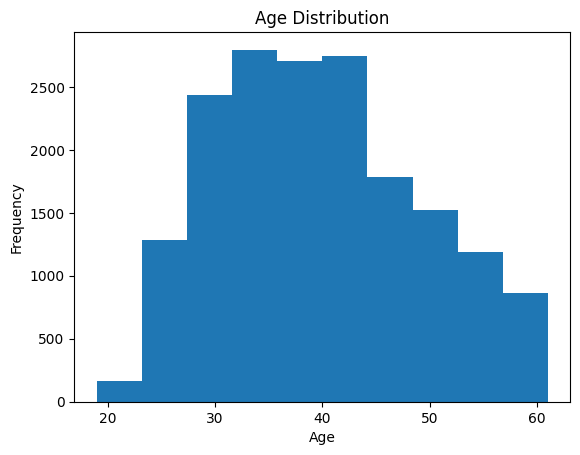

In [9]:
# Age distribution
plt.hist(df["age"], bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

In [ ]:
job_distribution = df["job"].value_counts()
print(job_distribution)

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


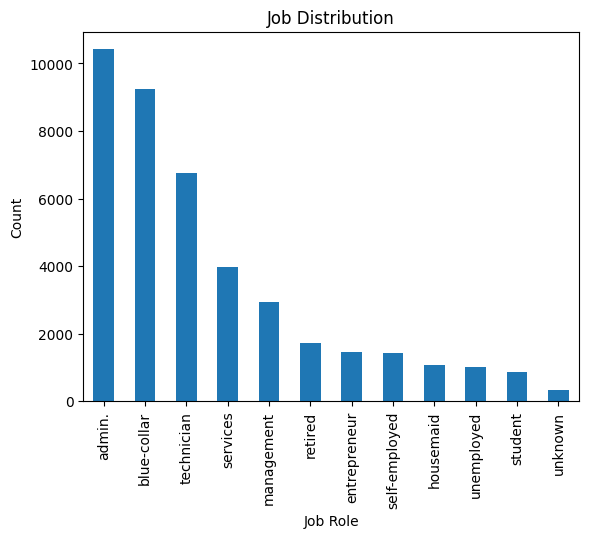

In [ ]:
# Job distribution
job_distribution.plot(kind="bar")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.title("Job Distribution")
plt.show()


## Balance & Deposit Trends

In [54]:
# Average balance by deposit subscription
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
# Average call duration by deposit subscription
df.groupby('y')['duration'].mean()

,duration
y,
no,234.463371
yes,920.276486


## Campaign Effectiveness

In [ ]:
# Contact method distribution
df["contact"].value_counts()

,count
contact,
cellular,26144
telephone,15044


In [15]:
# Contact method analysis
df.groupby(['contact', 'y']).size()

contact    y  
cellular   no      4242
           yes      325
telephone  no     12466
           yes      449
dtype: int64

Cellular contact is far more effective than telephone.

In [ ]:
# Number of contacts vs deposit subscription
contact_deposit = pd.crosstab(df["contact"], df["y"])
print(contact_deposit)

y             no   yes
contact               
cellular   22291  3853
telephone  14257   787


Cellular contact is far more effective than telephone.


## Correlation Heatmap

In [ ]:
# Correlation of numerical variables
num_df = df.select_dtypes(include=["int64", "float64"])
num_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754 

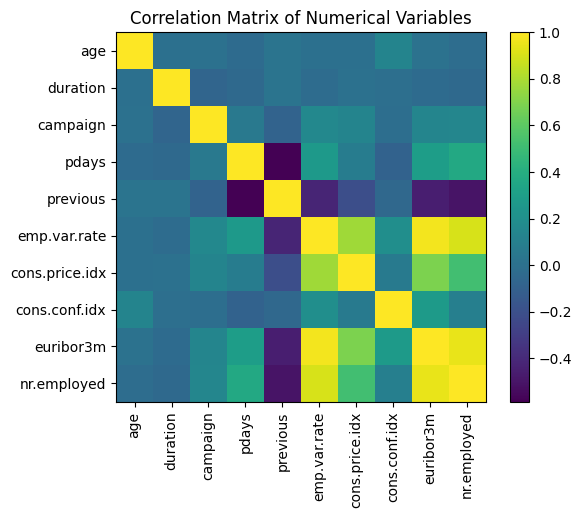

In [ ]:
correlation_matrix = num_df.corr()
print(correlation_matrix)


plt.imshow(correlation_matrix)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

## Predictive Modeling (Logistic Regression)

In [ ]:
# Identify categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [ ]:

# Encode categorical variables
df["y"] = df["y"].map({"yes": 1, "no": 0})
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns
df_encoded.select_dtypes(include=["object"]).columns





Index([], dtype='object')

In [58]:
# Predictions
y_pred = log_reg.predict(X_test)
y_pred
y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob
y_pred_prob_yes = log_reg.predict_proba(X_test)[:, 1]
y_pred_prob_yes
predictions = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Probability_Yes': y_pred_prob_yes
})

predictions.head()

,Actual,Predicted,Probability_Yes
0,0,0,0.083190
1,0,0,0.010096
2,0,0,0.019529
3,0,0,0.044872
4,0,0,0.025793


In [ ]:
X.dtypes

,0
age,int64
duration,int64
campaign,int64
pdays,int64
previous,int64
emp.var.rate,float64
cons.price.idx,float64
cons.conf.idx,float64
euribor3m,float64
nr.employed,float64


In [45]:
df['y'].value_counts(dropna=False)


,count
y,
NaN,17483


In [52]:
import pandas as pd
df = pd.read_csv('/content/data.csv')
df['y'].value_counts(dropna=False)
df['y'] = df['y'].astype(str).str.strip().str.lower()
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['y'].value_counts()
df['y'].isna().sum()
# Define X and y
y = df['y']
X = df.drop('y', axis=1)

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(0)

# Convert all features to numeric
X = X.astype(int)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)






/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [53]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
})

feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values(by='Abs_Coefficient', ascending=False).head(10)


,Feature,Coefficient,Abs_Coefficient
43,month_may,-0.744097,0.744097
42,month_mar,0.656004,0.656004
37,contact_telephone,-0.375952,0.375952
8,euribor3m,-0.319682,0.319682
41,month_jun,0.298671,0.298671
31,default_unknown,-0.290172,0.290172
5,emp.var.rate,-0.265708,0.265708
40,month_jul,0.248643,0.248643
51,poutcome_nonexistent,0.237942,0.237942
6,cons.price.idx,0.208811,0.208811


## Key Takeaways
- Certain age groups and job categories are more likely to subscribe.
- Higher balances correlate with higher subscription rates.
- Cellular contact is more effective than telephone.
- Campaign duration and number of contacts influence outcomes.
- Logistic regression shows which features are strongest predictors.